In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style("darkgrid")
import warnings 
warnings.filterwarnings('ignore')
import calendar

## First, lets look at the dataset and do some preprocessing

In [23]:
df = pd.read_csv('ign.csv')
df.drop(labels= 'Unnamed: 0', axis=1, inplace=True) #droping unwanted 'Unnamed: 0' column.
df.head() 

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [24]:
df.shape #data has 18625 rows with 10 features

(18625, 10)

In [25]:
df.info() #Information about the columns' names, datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 10 columns):
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.4+ MB


In [26]:
df.isnull().sum() #counting all the null values in columns

score_phrase       0
title              0
url                0
platform           0
score              0
genre             36
editors_choice     0
release_year       0
release_month      0
release_day        0
dtype: int64

## Lets start data analysis with Score Phrase

### Counting total Score Phrase reviews with percentages

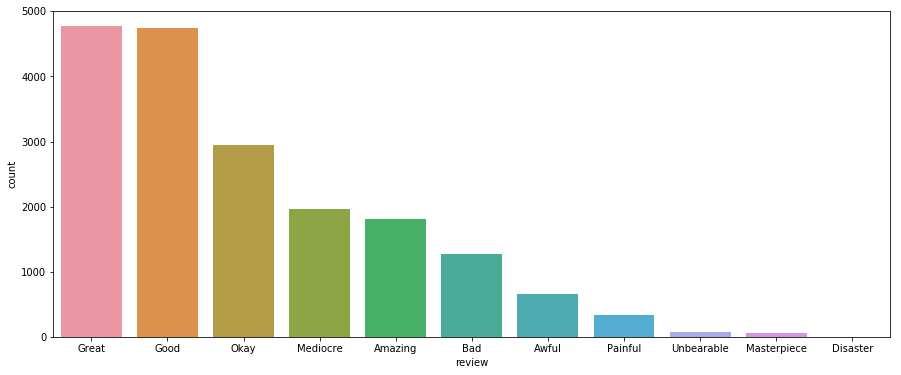

In [27]:
score_phrase = df.score_phrase.value_counts().reset_index()
score_phrase.rename(columns={'index':'review','score_phrase':'count'}, inplace=True)
score_phrase['percent'] = (score_phrase['count']/18625)*100
plt.figure(figsize=(15,6))
sns.barplot(x=score_phrase['review'], y=score_phrase['count'], data=score_phrase)

#### Observations
<ul>
    <li>Most of the available games have great score phrase.</li>
    <li>Approximately 50% of games have a Great and Good score.</li>
    <li>Very few games have Disastrous, Unbearable and Masterpiece score.</li>
</ul>

## Release Date and Time

There are three saperate columns of years, months and days of the months. We can count the number of games released in each of them.

### Number of games released in each year.

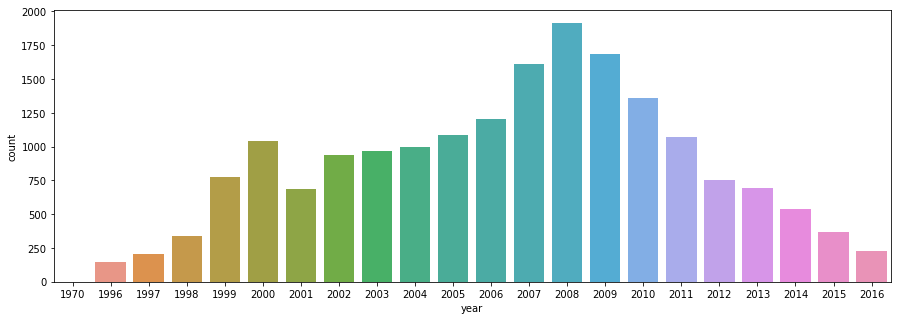

In [28]:
release_year = df.release_year.value_counts().reset_index()
release_year.rename(columns={'index':'year', 'release_year':'count'}, inplace=True)
release_year.sort_values(by='year', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='year', y='count', data=release_year) 

#### Observations
<ul>
    <li>Most games are released in year 2008 followed by 2009.</li>
    <li>In 90's, gaming community was not that much active. </li>
    <li>From 2001 to 2008, there is constant rise in releasing number of games.</li>
</ul>

Now lets analyze the number of games release in each month and on each day.

### Number of games released in each month.

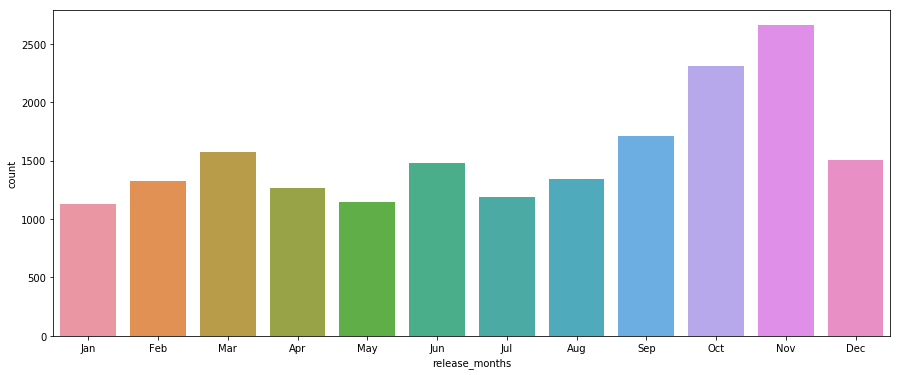

In [29]:
release_month = df.release_month.value_counts().reset_index()
release_month.rename(columns={'index':'release_months','release_month':'count'}, inplace=True)
release_month.sort_values(by='release_months', ascending=True, inplace=True)
release_month.release_months = release_month.release_months.apply(lambda x: calendar.month_abbr[x])
plt.figure(figsize=(15,6))
sns.barplot(x='release_months', y='count', data=release_month)

#### Observations
<ul>
    <li>Most games are released in November followed by October.</li>
    <li>In January, May and July, less number of games are released. </li>
</ul>

### Number of games released on the days of month

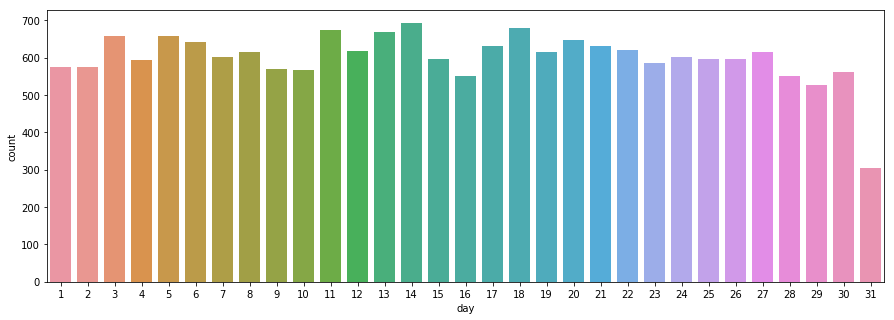

In [30]:
release_day = df.release_day.value_counts().reset_index()
release_day.rename(columns={'index': 'day', 'release_day': 'count'}, inplace=True)
release_day.sort_values(by='day', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='day', y='count', data=release_day)

## Platforms

### Total counts of top 10 platforms

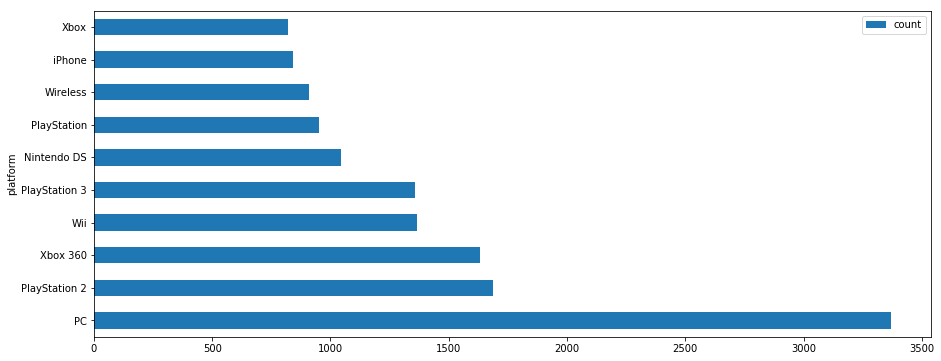

In [31]:
platform = df.platform.value_counts().reset_index()
platform.rename(columns={'index':'platform', 'platform':'count'}, inplace=True)
platform.sort_values(by='count', ascending=False, inplace=True)
plt.figure(figsize=(13,4))
platform[0:10].plot(x='platform', y='count', kind='barh', figsize=(15,6))

#### Observations
<ul>
    <li>As always, most of the games were released for PC platform. </li>
    <li>Playstation 2 seems to be more famous than Playstation 3. </li>
    <li>On XBox, very less number of games are available. </li>
</ul>

### Showing trending platforms from year 2011 to 2016.

As there are plenty of platforms available in the markets for games. So its futile to analyzed every one of them. So we will look into only significant ones.

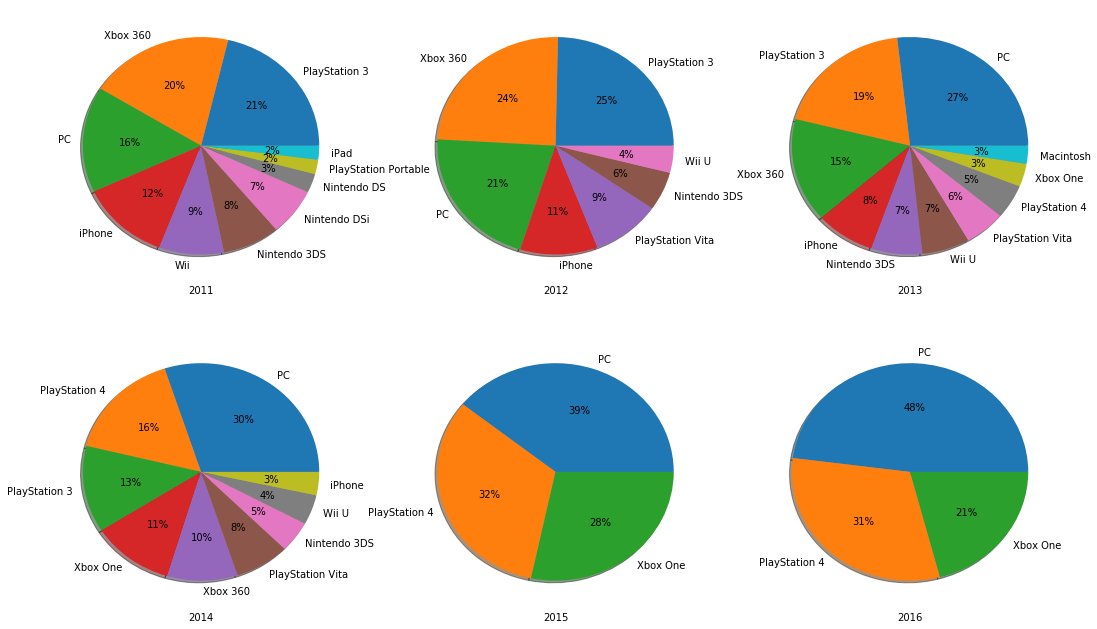

In [32]:
plt.figure(figsize=(18,11))
length_of_rows = 2
length_of_columns = 3
years = [2011, 2012, 2013, 2014, 2015, 2016]
for i in range(len(years)):
    plt.subplot(length_of_rows,length_of_columns,i+1)
    plats = df[df.release_year == years[i]]
    plats = plats.platform.value_counts().reset_index()
    plats.rename(columns={'index':'platform', 'platform':'count'}, inplace=True)
    plats = plats[plats['count'] > 15]
    plt.pie(x=plats['count'], labels=plats['platform'], autopct='%.0f%%', shadow=True)
    plt.xlabel(years[i])

#### Observations
<ul>
    <li>As always, from 2013 to 2016, most of the games were released for PC platform. PC is still a famous platform.</li>
    <li>All the Apple platforms seemed to be avoided by gamers. </li>
    <li>PC, PlayStation and XBox One are only 3 platforms which are used by the gamers in last couple of years. </li>
</ul>

### Showing score phrases with respect to platforms.

We need to find platforms individual count for all the score phrases by which we will be able to generalized the platforms which are famous in every score phrase.

In [33]:
print (df.score_phrase.unique())

['Amazing' 'Great' 'Good' 'Awful' 'Okay' 'Mediocre' 'Bad' 'Painful'
 'Unbearable' 'Disaster' 'Masterpiece']


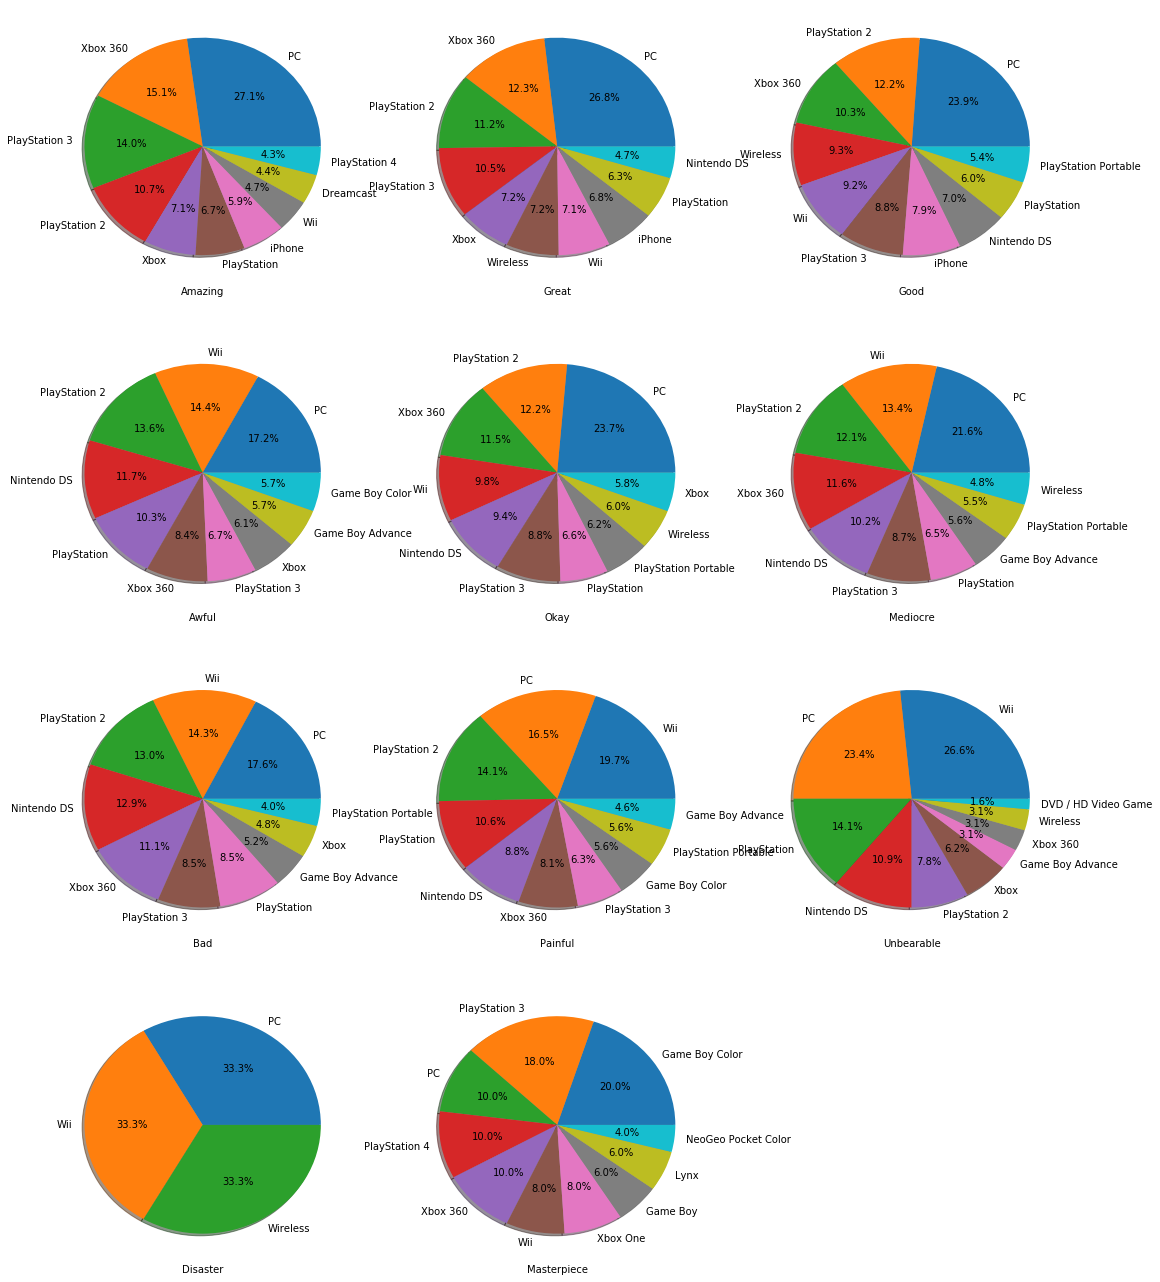

In [34]:
plt.figure(figsize=(18,23))
plt.tight_layout()
length_of_rows = 4
length_of_columns = 3
reviews = ['Amazing', 'Great', 'Good', 'Awful', 'Okay', 'Mediocre', 'Bad', 'Painful', 'Unbearable', 'Disaster', 'Masterpiece']
for i in range(len(reviews)):
    grp_scorep_plat = df.groupby(['score_phrase','platform']).size().reset_index()
    grp_scorep_plat.rename(columns={'score_phrase':'review', 0:'count'}, inplace=True)
    grp_scorep_plat = grp_scorep_plat[(grp_scorep_plat['review'] == reviews[i])]
    grp_scorep_plat = grp_scorep_plat.sort_values(by='count', ascending=False)[0:10]
    plt.subplot(length_of_rows,length_of_columns,i+1)
    plt.pie(x=grp_scorep_plat['count'], labels=grp_scorep_plat['platform'], autopct='%0.1f%%', shadow=True)
    plt.xlabel(reviews[i])

#### Observations
<ul>
    <li>Ironically, most loved and hated platform is PC. </li>
    <li>Wii, Wireless and PC platforms are equally disastrous. </li>
</ul>

## Genres

Lets look into uniques values of genre because there could be combinations.

In [36]:
df.genre.unique()

array(['Platformer', 'Puzzle', 'Sports', 'Strategy', 'Fighting', 'RPG',
       nan, 'Action, Adventure', 'Adventure', 'Action', 'Action, RPG',
       'Shooter', 'Music', 'Board', 'Racing', 'Strategy, RPG',
       'Racing, Action', 'Shooter, RPG', 'Simulation',
       'Action, Simulation', 'Flight, Action', 'Puzzle, Action',
       'Action, Compilation', 'Educational, Puzzle', 'Wrestling',
       'Fighting, Action', 'Productivity', 'Sports, Simulation',
       'Music, Action', 'Sports, Action', 'Party', 'Battle',
       'Puzzle, Adventure', 'Puzzle, Word Game', 'Card, Battle',
       'Simulation, Adventure', 'Compilation', 'Flight', 'Pinball',
       'Hunting', 'Casino', 'Sports, Racing', 'Fighting, Compilation',
       'Flight, Simulation', 'Trivia', 'Action, Platformer', 'Other',
       'Virtual Pet', 'Music, Editor', 'Sports, Editor',
       'Racing, Simulation', 'RPG, Editor', 'Educational, Action', 'Card',
       'Card, RPG', 'Wrestling, Simulation', 'Fighting, Adventure',
       '

In [37]:
df.platform.value_counts()[0:20]

PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
Name: platform, dtype: int64

### Showing genres with respect to top trending platforms.

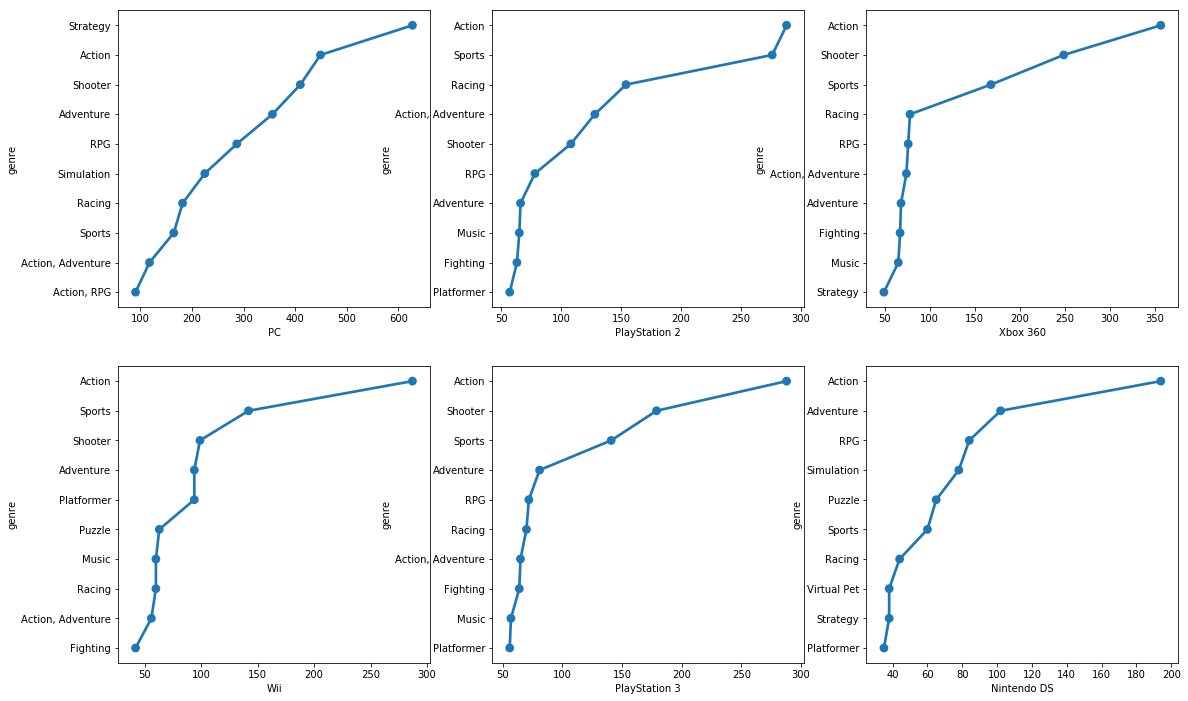

In [38]:
plt.figure(figsize=(19,12))
length_of_rows = 2
length_of_columns = 3
platform_genres = ['PC', 'PlayStation 2', 'Xbox 360', 'Wii', 'PlayStation 3', 'Nintendo DS']
for i in range(len(platform_genres)):
    genre_plat = df.groupby(['platform','genre']).size().reset_index()
    genre_plat.rename(columns={0:'count'}, inplace=True)
    genre_plat = genre_plat[genre_plat['platform'] == platform_genres[i]].sort_values(by='count', ascending=False)[:10]
    plt.subplot(length_of_rows, length_of_columns, i+1)
    sns.pointplot(y=genre_plat['genre'], x=genre_plat['count'])
    plt.xlabel(platform_genres[i])
plt.show()

#### Observations
<ul>
    <li>Pc is famous for strategy games like Age of Empires, World of Warcraft. And then comes action games. </li>
    <li>All platforms are mostly used by gamers to play action games. </li>
</ul>

### Showing top five genres with respect to each score phrases

Now, we are going to plot all the reviews with respect to top genres.

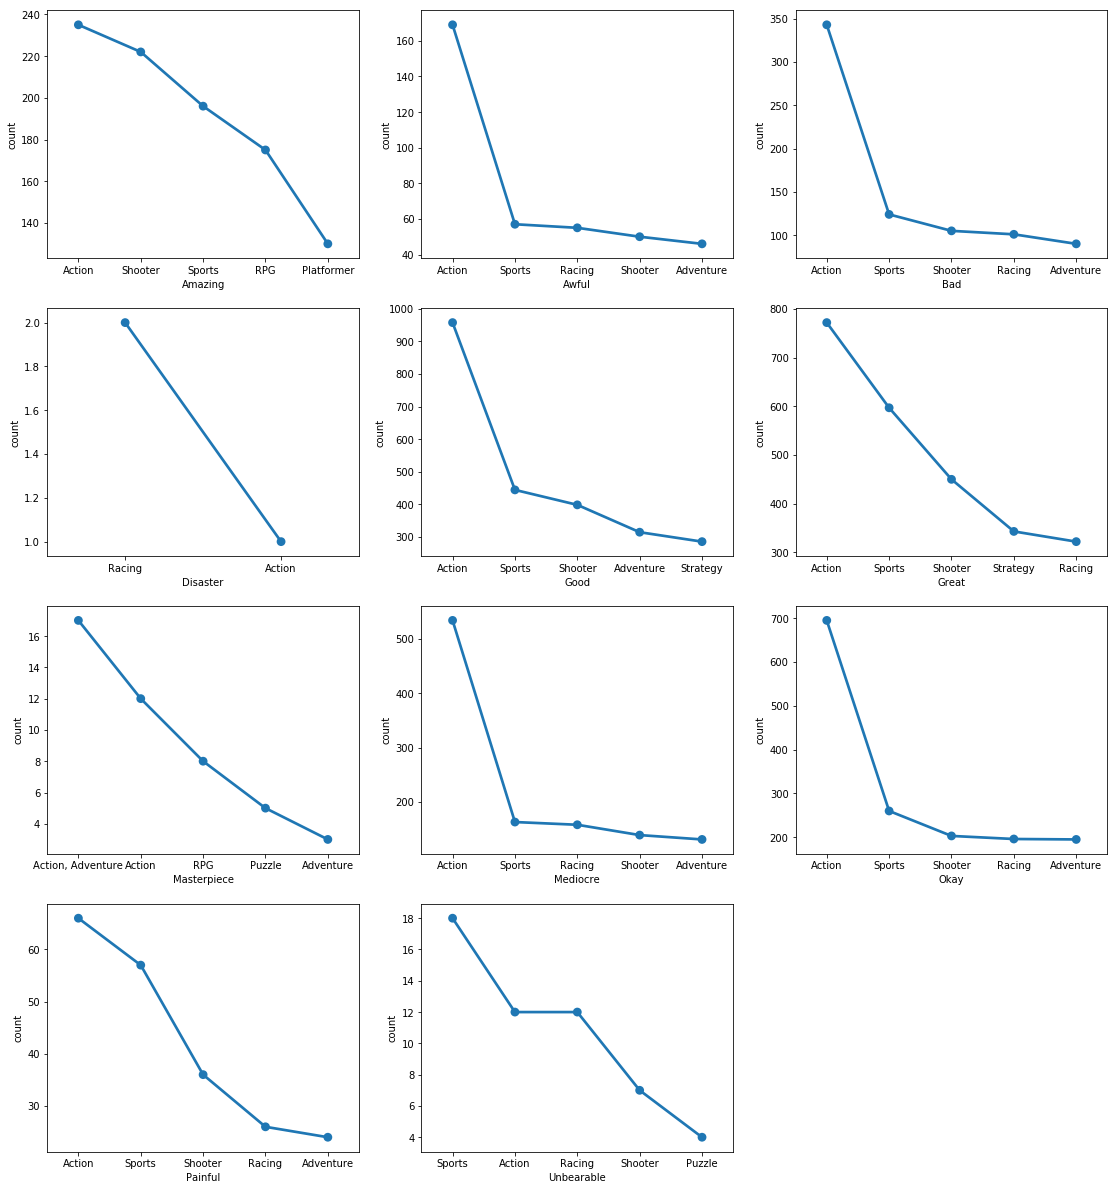

In [41]:
plt.figure(figsize=(19,21))
length_of_rows = 4
length_of_columns = 3
reviews = ['Amazing', 'Awful', 'Bad', 'Disaster', 'Good', 'Great', 'Masterpiece', 'Mediocre', 'Okay', 'Painful', 'Unbearable']
for i in range(len(reviews)):
    gp = df.groupby(['score_phrase','genre']).size().reset_index().sort_values(by=0, ascending=False).rename(columns={0:'count'})
    gp = gp[gp['score_phrase'] == reviews[i]][:5]
    plt.subplot(length_of_rows, length_of_columns, i+1)
    sns.pointplot(x=gp['genre'], y=gp['count'])
    plt.xlabel(reviews[i])
plt.show()

#### Observations
<ul>
    <li>Action genre is famous for every type of score phrase. </li>
    <li>After Action genre, Shooter and Sports genres are famous. </li>
</ul>

## Conclusion

If you are using PC platform and you have innate liking for action games then you are more likely to be lucky (more better games to play) and will have best gaming experience.


There are still a lot of combinations we can try. I have just tried to put forward some of many things. I hope this notebook has been interesting and useful.

Using this dataset, we found out about 20 years of IGN game releases, their popular platforms, scintillating details about game scoring, genres and much more. 
Thank you for watching!
